# Decision Trees
## Regression

Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:

In [2]:
from sklearn.tree import DecisionTreeRegressor
X = [[0,0], [2,2]]
y = [0.5, 2.5]
clf = DecisionTreeRegressor().fit(X,y)
print(clf.predict([[1,1]]))

[0.5]


### Decision Tree Regression, 1D regression with decision tree

The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the `max_depth` parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they **overfit**.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [13]:
#Create a random dataset
rng = np.random.RandomState(1)
#rng.rand((80,1)) outputs a vector of shape (80,1) with 80 random samples
X = np.sort(5 * rng.rand(80,1), axis=0)
y = np.sin(X) #shape (80,1)
y = y.ravel() #to flatten the array, shape (80,)
#16 values, one for each 5 points. It adds noise to every 5 points
y[::5] += 3*(0.5 - rng.rand(16))

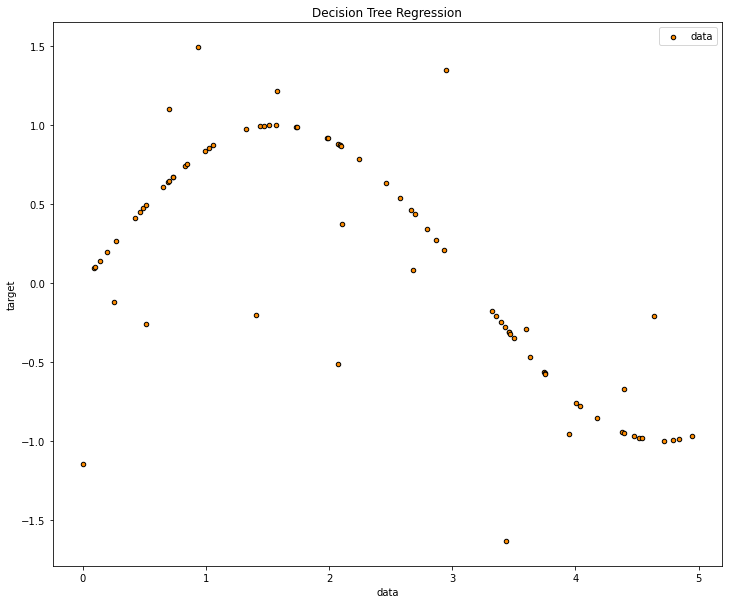

In [20]:
plt.figure(figsize=(12,10))
plt.scatter(X,y, s=20, edgecolors='black', c='darkorange', label='data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

In [21]:
#Fit regression model
regr1 = DecisionTreeRegressor(max_depth=2)
regr2 = DecisionTreeRegressor(max_depth=5)
regr1.fit(X,y)
regr2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [25]:
#Predict
#np.newaxis to change the shape by adding a new axis
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

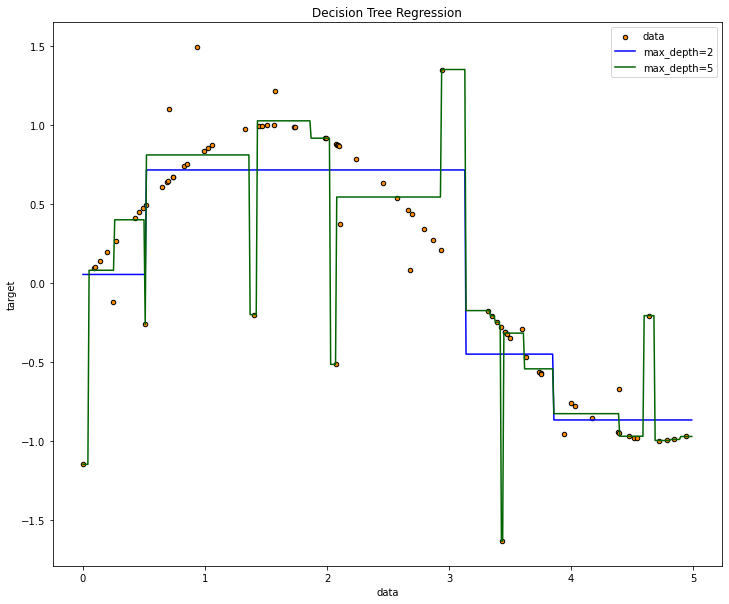

In [27]:
#Plot the results
plt.figure(figsize=(12,10))
plt.scatter(X,y, s=20, edgecolors='black', c='darkorange', label='data')
plt.plot(X_test, y_1, c='blue', label='max_depth=2')
plt.plot(X_test, y_2, c='darkgreen', label='max_depth=5')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()